In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv")
Data.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [3]:
Data.tail()

MODELYEAR   MAKE     MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
1062       2014  VOLVO  XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO  XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO  XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO  XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
Data.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

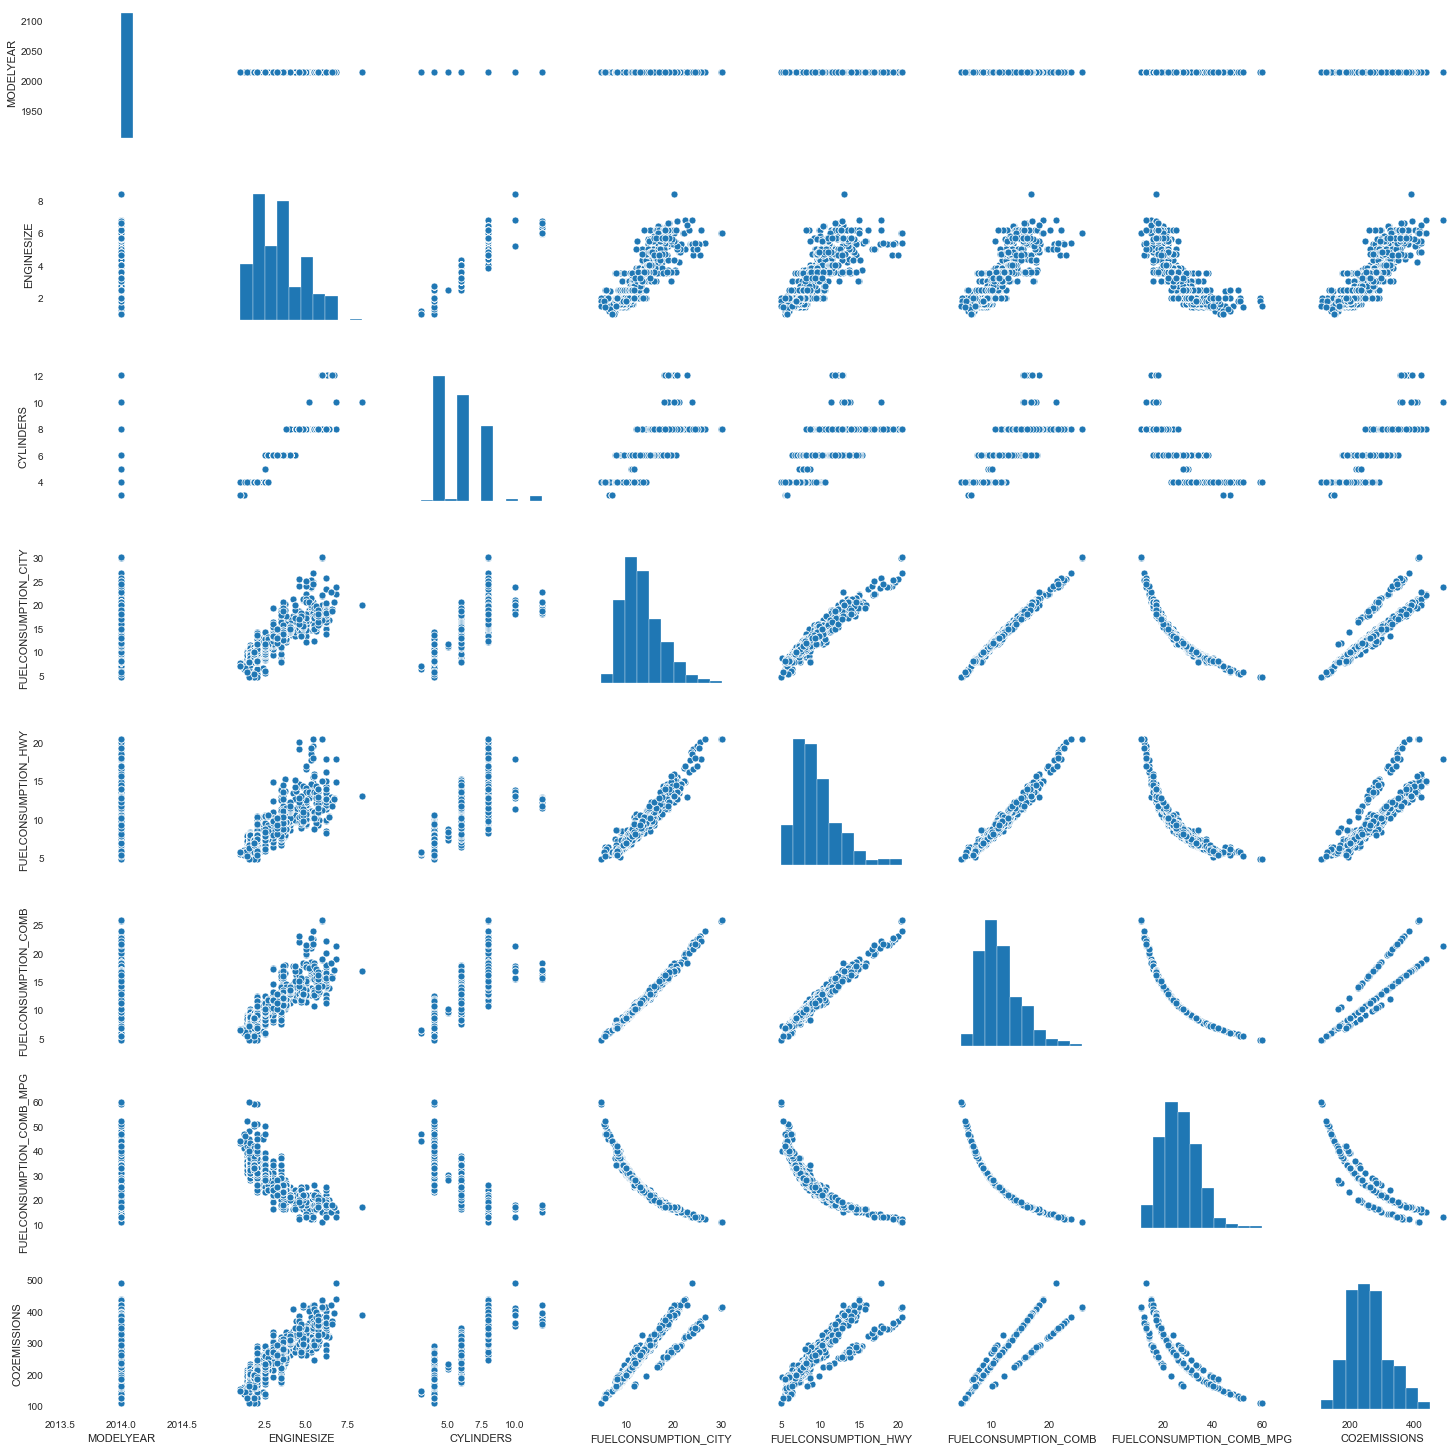

In [6]:
sns.pairplot(Data)

In [7]:
Data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
Features = Data[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Target = Data.CO2EMISSIONS


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(Features,Target,test_size=0.3)

In [11]:
x_train.shape

(746, 7)

In [12]:
x_test.shape

(321, 7)

In [13]:
y_test.shape

(321,)

In [14]:
y_train.shape

(746,)

In [15]:
from sklearn.linear_model import LinearRegression,Ridge
lm = LinearRegression().fit(x_train,y_train)

In [16]:
lm

LinearRegression()

In [17]:
lm.coef_

array([  0.        ,   8.47033451,   8.76349433, -16.76713529,
        -6.56322372,  26.43863732,  -4.01537515])

In [18]:
lm.intercept_

262.2551733064974

In [19]:
Lm_predication=lm.predict(x_test)

In [20]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Predication":Lm_predication,
             "Error":y_test-Lm_predication})  # ind Error 


Actual_Data  New_Predication      Error
81            193       189.479311   3.520689
629           230       223.973723   6.026277
591           225       219.700761   5.299239
762           278       278.442731  -0.442731
301           317       323.506597  -6.506597
...           ...              ...        ...
743           242       254.346812 -12.346812
886           212       228.488673 -16.488673
1035          189       191.245153  -2.245153
270           290       278.372863  11.627137
1043          198       196.139771   1.860229

[321 rows x 3 columns]

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
mean_squared_error(y_test,Lm_predication)

441.2548661117204

In [23]:
mean_absolute_error(y_test,Lm_predication)

13.860843961389389

In [24]:
Rg = Ridge(alpha=1) ## Regulization parameters 

In [25]:
Rg.fit(x_train,y_train)

Ridge(alpha=1)

In [26]:
Rg.coef_

array([ 0.        ,  8.4985747 ,  8.72375621, -6.72267575,  1.63236514,
        8.22763738, -4.0038718 ])

In [27]:
pd.DataFrame({"Features":Features.columns,
              "Linear_Coefficent":lm.coef_,
             "Ridge_Coefficent":Rg.coef_})

Features  Linear_Coefficent  Ridge_Coefficent
0                 MODELYEAR           0.000000          0.000000
1                ENGINESIZE           8.470335          8.498575
2                 CYLINDERS           8.763494          8.723756
3      FUELCONSUMPTION_CITY         -16.767135         -6.722676
4       FUELCONSUMPTION_HWY          -6.563224          1.632365
5      FUELCONSUMPTION_COMB          26.438637          8.227637
6  FUELCONSUMPTION_COMB_MPG          -4.015375         -4.003872

In [28]:
Rg.intercept_

261.76153535919565

In [29]:
Rg_predicted = Rg.predict(x_test)

In [30]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Rg_predication":Rg_predicted,
              'Rg_Error':y_test-Rg_predicted,
              "Linear_new_predication":Lm_predication,
              "Lm_error":y_test-Lm_predication
             })

Actual_Data  New_Rg_predication   Rg_Error  Linear_new_predication  \
81            193          190.017838   2.982162              189.479311   
629           230          224.131230   5.868770              223.973723   
591           225          220.498634   4.501366              219.700761   
762           278          278.370424  -0.370424              278.442731   
301           317          323.951099  -6.951099              323.506597   
...           ...                 ...        ...                     ...   
743           242          254.828702 -12.828702              254.346812   
886           212          228.771334 -16.771334              228.488673   
1035          189          191.032674  -2.032674              191.245153   
270           290          278.781051  11.218949              278.372863   
1043          198          195.292736   2.707264              196.139771   

       Lm_error  
81     3.520689  
629    6.026277  
591    5.299239  
762   -0.442731  
301   -6.506597  
...         ...  
743  -12.346812  
886  -16.488673  
1035  -2.245153  
270   11.627137  
1043   1.860229  

[321 rows x 5 columns]

In [31]:
mean_squared_error(y_test,Rg_predicted)

440.2597142592286

In [32]:
mean_absolute_error(y_test,Rg_predicted)

13.862893671745319

In [33]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lm,x_train,y_train,cv=20)
cv

array([0.88340246, 0.82344778, 0.91331692, 0.87477312, 0.89770404,
       0.86064707, 0.94899116, 0.88466173, 0.93733417, 0.81139675,
       0.91182411, 0.92929364, 0.8356505 , 0.82945707, 0.92703582,
       0.84735777, 0.84842698, 0.85476234, 0.86689629, 0.87374117])

In [34]:
cv = cross_val_score(lm,x_train,y_train,cv=20)

In [35]:
Train_Score = lm.score(x_train,y_train)
print("Train score of a model is",Train_Score)

Train score of a model is 0.885502125386059


In [36]:
Test_Score = lm.score(x_test,y_test)
print("Test score of a model is",Test_Score)

Test score of a model is 0.8954253527196718


In [37]:
np.mean(cv)

0.8780060443685956

In [38]:
np.max(cv)

0.9489911626314019

In [39]:
np.min(cv)

0.8113967542095448

In [40]:
from sklearn.model_selection import KFold

In [41]:
Cv_k = KFold(n_splits=2)

In [42]:
Cv_k.get_n_splits(Features)

2

In [43]:
print(Cv_k)

KFold(n_splits=2, random_state=None, shuffle=False)


In [44]:
for train_index,test_index in Cv_k.split(x_train):
    print("Train",train_index,"Test",test_index)

Train [373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390
 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534
 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552
 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570
 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588
 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606
 607 608 609 610 611 612 613 614 615 616 617 

In [45]:
Rg = Ridge(alpha=1) ## Regulization parameters 

In [46]:
Rg.fit(x_train,y_train)

Ridge(alpha=1)

In [47]:
Rg.coef_

array([ 0.        ,  8.4985747 ,  8.72375621, -6.72267575,  1.63236514,
        8.22763738, -4.0038718 ])

In [48]:
pd.DataFrame({"Features":Features.columns,
              "Linear_Coefficent":lm.coef_,
             "Ridge_Coefficent":Rg.coef_})

Features  Linear_Coefficent  Ridge_Coefficent
0                 MODELYEAR           0.000000          0.000000
1                ENGINESIZE           8.470335          8.498575
2                 CYLINDERS           8.763494          8.723756
3      FUELCONSUMPTION_CITY         -16.767135         -6.722676
4       FUELCONSUMPTION_HWY          -6.563224          1.632365
5      FUELCONSUMPTION_COMB          26.438637          8.227637
6  FUELCONSUMPTION_COMB_MPG          -4.015375         -4.003872

In [49]:
Rg.intercept_

261.76153535919565

In [50]:
Rg_predicted = Rg.predict(x_test)

In [51]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Rg_predication":Rg_predicted,
              'Rg_Error':y_test-Rg_predicted,
              "Linear_new_predication":Lm_predication,
              "Lm_error":y_test-Lm_predication
             })

Actual_Data  New_Rg_predication   Rg_Error  Linear_new_predication  \
81            193          190.017838   2.982162              189.479311   
629           230          224.131230   5.868770              223.973723   
591           225          220.498634   4.501366              219.700761   
762           278          278.370424  -0.370424              278.442731   
301           317          323.951099  -6.951099              323.506597   
...           ...                 ...        ...                     ...   
743           242          254.828702 -12.828702              254.346812   
886           212          228.771334 -16.771334              228.488673   
1035          189          191.032674  -2.032674              191.245153   
270           290          278.781051  11.218949              278.372863   
1043          198          195.292736   2.707264              196.139771   

       Lm_error  
81     3.520689  
629    6.026277  
591    5.299239  
762   -0.442731  
301   -6.506597  
...         ...  
743  -12.346812  
886  -16.488673  
1035  -2.245153  
270   11.627137  
1043   1.860229  

[321 rows x 5 columns]

In [52]:
mean_squared_error(y_test,Rg_predicted)

440.2597142592286

In [53]:
mean_absolute_error(y_test,Rg_predicted)

13.862893671745319

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
CV = cross_val_score(Rg,x_train,y_train,cv=20)
CV

array([0.88339559, 0.82290354, 0.91414961, 0.87383828, 0.8968751 ,
       0.86022474, 0.94917613, 0.8846711 , 0.93932547, 0.81231139,
       0.91089453, 0.92967327, 0.83610239, 0.82936937, 0.92699992,
       0.84611345, 0.84808355, 0.85430894, 0.86918765, 0.8731147 ])

In [70]:
np.mean(CV)

0.8780359348548219

In [71]:
np.max(CV)

0.9491761264559205

In [72]:
np.min(CV)

0.812311385453632

In [73]:
from sklearn.model_selection import KFold

In [74]:
Rg = KFold(n_splits=3)

In [75]:
Rg.get_n_splits(Features)

3

In [76]:
print(Rg)

KFold(n_splits=3, random_state=None, shuffle=False)


In [63]:
for train_index,test_index in Rg.split(x_train):
    print("Train",train_index,"Test",test_index)

Train [249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392
 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410
 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464
 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 489 490 491 492 493 

In [55]:
from sklearn.linear_model import Lasso

In [56]:
ls = Lasso(alpha=1.0)

In [57]:
ls.fit(x_train,y_train)

Lasso()

In [58]:
Lasso_Train_Score = ls.score(x_train,y_train)

In [59]:
print("Train Score For Lasso",Lasso_Train_Score)

Train Score For Lasso 0.8843824274949963


In [60]:
Lasso_Test_Score = ls.score(x_test,y_test)

In [61]:
print("Test Score For Lasso",Lasso_Test_Score)

Test Score For Lasso 0.8975461440041927


In [62]:
ls.coef_

array([ 0.        ,  6.96373076,  8.34012551,  0.        ,  3.13124412,
        0.        , -3.90648112])

In [63]:
pd.DataFrame({"Features":Features.columns,
              "Linear_Coefficent":lm.coef_,
             "Ridge_Coefficent":Rg.coef_,
             "Lasso_coef":ls.coef_})

Features  Linear_Coefficent  Ridge_Coefficent  Lasso_coef
0                 MODELYEAR           0.000000          0.000000    0.000000
1                ENGINESIZE           8.470335          8.498575    6.963731
2                 CYLINDERS           8.763494          8.723756    8.340126
3      FUELCONSUMPTION_CITY         -16.767135         -6.722676    0.000000
4       FUELCONSUMPTION_HWY          -6.563224          1.632365    3.131244
5      FUELCONSUMPTION_COMB          26.438637          8.227637    0.000000
6  FUELCONSUMPTION_COMB_MPG          -4.015375         -4.003872   -3.906481

In [64]:
ls_predication = ls.predict(x_test)

In [65]:
Lasso_Error = mean_squared_error(y_test,ls_predication)
Lasso_Error

432.30614384834405

In [66]:
mean_absolute_error(y_test,ls_predication)

13.542115824187565

In [67]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Rg_predication":Rg_predicted,
              'Rg_Error':y_test-Rg_predicted,
              "Linear_new_predication":Lm_predication,
              "Lm_error":y_test-Lm_predication,
              "Lasso_Predication":ls_predication,
              "Lasso_Error":y_test-ls_predication
             })

Actual_Data  New_Rg_predication   Rg_Error  Linear_new_predication  \
81            193          190.017838   2.982162              189.479311   
629           230          224.131230   5.868770              223.973723   
591           225          220.498634   4.501366              219.700761   
762           278          278.370424  -0.370424              278.442731   
301           317          323.951099  -6.951099              323.506597   
...           ...                 ...        ...                     ...   
743           242          254.828702 -12.828702              254.346812   
886           212          228.771334 -16.771334              228.488673   
1035          189          191.032674  -2.032674              191.245153   
270           290          278.781051  11.218949              278.372863   
1043          198          195.292736   2.707264              196.139771   

       Lm_error  Lasso_Predication  Lasso_Error  
81     3.520689         193.002051    -0.002051  
629    6.026277         224.862670     5.137330  
591    5.299239         220.956189     4.043811  
762   -0.442731         275.624167     2.375833  
301   -6.506597         323.592432    -6.592432  
...         ...                ...          ...  
743  -12.346812         254.048879   -12.048879  
886  -16.488673         229.094477   -17.094477  
1035  -2.245153         192.235554    -3.235554  
270   11.627137         279.287648    10.712352  
1043   1.860229         196.768284     1.231716  

[321 rows x 7 columns]

In [77]:
from sklearn.linear_model import RidgeCV

In [78]:
Ridge_CV = RidgeCV()

In [79]:
Ridge_CV.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [80]:
Ridge_CV.coef_

array([ 0.        ,  8.35006572,  8.66248367, -2.96782978,  4.3060205 ,
        1.82744476, -3.98627255])

In [81]:
Ridge_CV.intercept_

260.998102084674

In [82]:
Ridge_CV_Prediction = Ridge_CV.predict(x_test)

In [83]:
pd.DataFrame({"Actual_Data":y_test,
             "New_predicted_Data":Ridge_CV_Prediction,
              'Error':y_test-Ridge_CV_Prediction})


Actual_Data  New_predicted_Data      Error
81            193          190.476273   2.523727
629           230          224.253721   5.746279
591           225          220.792309   4.207691
762           278          278.070343  -0.070343
301           317          324.020933  -7.020933
...           ...                 ...        ...
743           242          254.878081 -12.878081
886           212          228.864997 -16.864997
1035          189          191.082673  -2.082673
270           290          278.952143  11.047857
1043          198          195.177212   2.822788

[321 rows x 3 columns]

In [85]:
mean_squared_error(y_test,Ridge_CV_Prediction)

438.64981055402666

In [86]:
mean_absolute_error = (y_test,Ridge_CV_Prediction)

In [90]:
cv = cross_val_score(Ridge_CV, x_train,y_train,cv=20)
cv

array([0.88380827, 0.82252979, 0.91495244, 0.87332174, 0.8962902 ,
       0.86001785, 0.94948892, 0.88470532, 0.94025119, 0.81330271,
       0.9102308 , 0.93006398, 0.83619594, 0.82915159, 0.92651064,
       0.84672736, 0.84733889, 0.85329838, 0.86976323, 0.8727612 ])

In [91]:
np.mean(cv)

0.8780355208474226

In [92]:
np.max(cv)

0.9494889171576867

In [93]:
np.min(cv)

0.813302706262723

In [114]:
from sklearn.linear_model import LassoCV

In [98]:
Lasso_CV = LassoCV(alphas=[0.1,1])

In [99]:
Lasso_CV.fit(x_train,y_train)

LassoCV(alphas=[0.1, 1])

In [106]:
Lasso_CV_Prediction = Lasso_CV.predict(x_test)

In [109]:
pd.DataFrame({"Actual_Data":y_test,
             "Lasso_CV_Prediction":Lasso_CV_Prediction,
              'Error':y_test-Lasso_CV_Prediction})


Actual_Data  Lasso_CV_Prediction      Error
81            193           190.722953   2.277047
629           230           224.251563   5.748437
591           225           220.829313   4.170687
762           278           277.811944   0.188056
301           317           324.301596  -7.301596
...           ...                  ...        ...
743           242           254.877486 -12.877486
886           212           228.892499 -16.892499
1035          189           191.113400  -2.113400
270           290           278.973111  11.026889
1043          198           195.169756   2.830244

[321 rows x 3 columns]

In [116]:
from sklearn.metrics import mean_absolute_error 

In [112]:
mean_squared_error(y_test,Lasso_CV_Prediction)

437.90641010906967

In [117]:
mean_absolute_error(y_test,Lasso_CV_Prediction)

13.812576644676579

In [118]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [119]:
Enet = ElasticNet(alpha=0.1,l1_ratio=0.5)

In [120]:
Enet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [121]:
Enet_Prediction = Enet.predict(x_test)

In [122]:
pd.DataFrame({"Actual_Data":y_test,
             "Enet_Prediction":Enet_Prediction,
              'Error':y_test-Enet_Prediction})


Actual_Data  Enet_Prediction      Error
81            193       191.466915   1.533085
629           230       224.514344   5.485656
591           225       220.916293   4.083707
762           278       277.097538   0.902462
301           317       323.836709  -6.836709
...           ...              ...        ...
743           242       254.501685 -12.501685
886           212       228.838794 -16.838794
1035          189       191.498581  -2.498581
270           290       279.077033  10.922967
1043          198       195.742418   2.257582

[321 rows x 3 columns]

In [123]:
Enet_Train_Score = Enet.score(x_train,y_train)

In [124]:
Enet_Train_Score

0.8851512713122716

In [125]:
Enet_Test_Score = Enet.score(x_test,y_test)

In [126]:
Enet_Test_Score

0.8970128024712887

In [127]:
Enet_cv = ElasticNetCV()

In [128]:
Enet_cv.fit(x_train,y_train)

ElasticNetCV()

In [129]:
Enet_cv_Prediction = Enet_cv.predict(x_test)

In [130]:
pd.DataFrame({"Actual_Data":y_test,
             "Enet_CV_Prediction":Enet_cv_Prediction,
              'Error':y_test-Enet_cv_Prediction})


Actual_Data  Enet_CV_Prediction      Error
81            193          194.877804  -1.877804
629           230          226.803755   3.196245
591           225          222.436555   2.563445
762           278          274.539657   3.460343
301           317          320.388579  -3.388579
...           ...                 ...        ...
743           242          252.601717 -10.601717
886           212          227.778501 -15.778501
1035          189          193.515025  -4.515025
270           290          279.837417  10.162583
1043          198          198.609556  -0.609556

[321 rows x 3 columns]